[![Open in Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fat-forensics/events/master?filepath=resources%2F2021_EURO-explainability%2Fslides%2FEURO21.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fat-forensics/events/blob/master/resources/2021_EURO-explainability/slides/EURO21.ipynb)
[![new BSD](https://img.shields.io/github/license/fat-forensics/events.svg)](https://github.com/fat-forensics/events/blob/master/LICENCE)

# Making Machine Learning Explanations Truthful and Intelligible #

Slides for the special session on **Fair and Explainable Models**
held at the 31st European Conference on Operational Research (2021).

---

This presentation is created with [RISE](https://rise.readthedocs.io/) and
offered as a Jupyter Notebook.
To launch the slideshow (based on the [reveal.js](https://revealjs.com/)
framework) install the dependencies (`pip install -r requirements.txt`) and
open the notebook within a Jupyter Notebook environment (not Jupyter Lab);
next:

1. execute all cells, and
2. launch RISE presentation by clicking the bar chart icon
   (<img src="../../../assets/images/barchart.svg" width=20px />) shown in the
   Jupyter Notebook toolbar.

More details are available on
<https://events.fat-forensics.org/2021_euro-explainability>.

<h1 style="text-align: center">Making Machine Learning Explanations<br\>Truthful and Intelligible</h1>
<br><br><br><br><br><br>  
<img width="25%" style="vertical-align:bottom; float:left;" src="../../../assets/images/uob.svg">
<p style="vertical-align:bottom; float:right; font-size: 120%;"><b>Kacper Sokol</b></p>

In [1]:
import os
REPOSITORY = (
    'https://raw.githubusercontent.com/fat-forensics/resources/master/{}')
SCRIPTS = [
    'surrogates_overview/scripts/__init__.py',
    'surrogates_overview/scripts/image_classifier.py',
    'surrogates_overview/scripts/imagenet_label_map.py',
    'surrogates_overview/scripts/surrogates_overview.py',
    'pi_ice_pd/pi_ice_pd.py'
]

! pip install -r requirements.txt

img = 'doggo.jpg'
img_path = 'surrogates_overview/img/{}'.format(img)
img_url = REPOSITORY.format(img_path)
if not os.path.exists(img):
    ! wget $img_url -O $img

scr = 'scripts/'
! mkdir -p $scr
for script in SCRIPTS:
    url = REPOSITORY.format(script)
    scrpt = scr + os.path.basename(script)
    if not os.path.exists(scrpt):
        ! wget $url -O $scrpt

You are using pip version 18.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [3]:
from PIL import Image

import numpy as np

import scripts.image_classifier as imgclf
import scripts.pi_ice_pd as pid
import scripts.surrogates_overview as exo

import sklearn.datasets
import sklearn.linear_model

22-May-02 16:31:28 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [4]:
# Load the image
doggo_img = Image.open('doggo.jpg')
doggo_array = np.array(doggo_img)

# Load the classifier
clf = imgclf.ImageClassifier()

# doggo_y = clf.predict(doggo)
doggo_proba = clf.predict_proba([doggo_array])
doggo_labels_3 = clf.proba2tuple(doggo_proba, labels_no=3)[0]

# Fix global options
SAMPLES = 10
BATCH = 100

<h2 style="text-align: center">What is Explainability?</h2>

**No universally accepted definition.**

* **Simulatability**\
  (*Lipton, 2018. The mythos of model interpretability*)
* **The Chinese Room Theorem**\
  (*Searle, 1980. Minds, brains, and programs*)
* **Mental Models**\
  (*Kulesza et al., 2013. Too much, too little, or just right? Ways explanations impact end users' mental models*)
  - **Functional** – operationalisation without understanding;
  - **Structural** – appreciation of the underlying mechanism.

$$
\texttt{Explainability} \; =
$$
<br>
$$
\underbrace{ \texttt{Reasoning} \left( \texttt{Transparency} \; | \; \texttt{Background Knowledge} \right)}_{\textit{understanding}}
$$

* *Transparency* – **insight** (of arbitrary complexity) into operation of a system.
* *Background Knowledge* – implicit or explicit **exogenous information**.
* *Reasoning* – **algorithmic** or **mental processing** of information.

Explainability &rarr; **explainee** walking away with **understanding**.

### Human-Centred Explainability ###

<div class="row">
<div class="column">

<img width="90%" align="middle" src="../../../assets/images/figures/explanation.png" alt="insights from social sciences" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br><br><br><br>

Human-centred explanations:
* interactive dialogue (bi-directional);
* contrastive statements.

</div>
</div>

<h2 style="text-align: center">The Benefits and Dangers of &nbsp; <i>Universal</i> &nbsp; Explainers<br><br>(surrogates)</h2>

### Benefits ###

<div class="row">
<div class="column">

* **Model-agnostic** – work with any black box.
* **Post-hoc** – can be retrofitted into pre-existing predictors.
* **Data-universal** – work with image, tabular and text data because of interpretable data representations.

</div>
<div class="column">
<br><br>

<!-- https://www.kindpng.com/imgv/hTbmhJ_silver-bullet-image-png-transparent-png/ -->
<img width="90%" align="middle" src="../../../assets/images/figures/bullet.png" alt="silver bullet" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

### Caveat: The No Free Lunch Theorem ###

<img width="75%" align="middle" src="../../../assets/images/figures/lunch.jpeg" alt="no-free-lunch" style="display: block; margin-left: auto; margin-right: auto;">

### Post-hoc Explainers have Poor Fidelity ###

<div class="row">

<div class="column">

<br>
<img width="90%" align="middle" src="../../../assets/images/figures/stop.png" alt="ante-hoc explainability" style="display: block; margin-left: auto; margin-right: auto;">

</div>

<div class="column fragment">
    
* Explainability needs a **process** similar to: *KDD*, *CRISP-DM* or *BigData*.

<img width="40%" align="middle" src="../../../assets/images/figures/proc.png" alt="data process" style="display: block; margin-left: auto; margin-right: auto;">

<div class="fragment">
    
* Focus on engineering **informative features** and **inherently transparent models**.

> **It requires effort.**

</div>

</div>

</div>

### XAI Process ###

<img width="15%" style="vertical-align:top; float:right;" src="../../../assets/images/figures/xai-process.png">

A **generic** eXplainable Artificial Intelligence Process is *beyond our reach* at the moment.
- **XAI Taxonomy** spanning social and technical desiderata:\
  &bull; Functional &bull; Operational &bull; Usability &bull; Safety &bull; Validation &bull;\
  <span style="font-size: 18px;">(*Sokol and Flach, 2020. Explainability Fact Sheets: A Framework for Systematic Assessment of Explainable Approaches*)</span>

- **Framework** for black-box explainers.\
  <span style="font-size: 18px;">(*Henin and Le Métayer, 2019. Towards a generic framework for black-box explanations of algorithmic decision systems*)</span>

<img width="60%" align="middle" src="../../../assets/images/figures/framework.png" alt="XAI process" style="display: block; margin-left: auto; margin-right: auto;">

### bLIMEy, there has to be a better way... ###

<img width="15%" style="vertical-align:top; float:right;" src="../../../assets/images/figures/blimey.jpg">

bLIMEy &rarr; build LIME yourself\
(*Sokol et al., 2019. bLIMEy: Surrogate prediction explanations beyond LIME*)
* Framework for building surrogate explainers.
* Meta-algorithm for operationalising them.
* Accompanied by analysis of surrogate building blocks (akin to a user guide).
* Practical recommendations.

**Good news:** A means to build flexible, faithful, interactive, ... surrogates.\
**Not so good news:** It requires effort.

### bLIMEy Framework

<img width="90%" align="middle" src="../../../assets/images/figures/blimey-proc.svg" alt="bLIMEy framework" style="display: block; margin-left: auto; margin-right: auto;">

### Operationalising Surrogates ###

<div class="row">
<div class="column">

- We need to:
  * Understand where surrogates come from.
  * Know how to (correctly) interpret their explanations.
- Then we should:
  * Analyse needed components and choose suitable algorithms.
  * Evaluate and validate them.

</div>
<div class="column">

<img width="80%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">

**LIME: Local Interpretable Model-agnostic Explanations**
    
<span style="font-size: 18px;">(*Ribeiro et al., 2016. "Why should I trust you?" Explaining the predictions of any classifier*)</span>

</div>
</div>

<h2 style="text-align: center">Surrogate Image Explainers</h2>

### Black-box Prediction ###

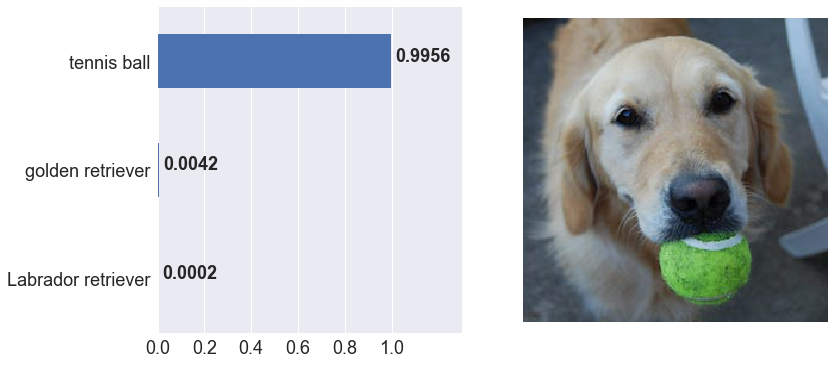

In [5]:
classification = exo.plot_image_prediction(doggo_labels_3, doggo_array)

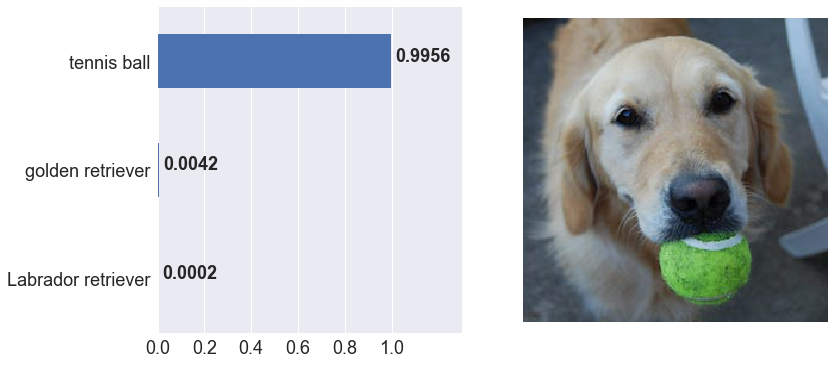

In [6]:
classification

### Prediction Explanation ###

In [7]:
# LIME explanation for tennis ball/golden retriever/Labrador retriever <->
# image colouring <-> bar plot
explain_classes = [(i[0], i[2]) for i in doggo_labels_3]
blimey_image = exo.build_image_blimey(
    doggo_array,
    clf.predict_proba,
    explain_classes,
    explanation_size=5,
    segments_number=13,
    occlusion_colour='mean',
    samples_number=SAMPLES,
    batch_size=BATCH,
    random_seed=42)

22-May-02 16:31:30 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:30 fatf         INFO     Seeding RNGs with 42.


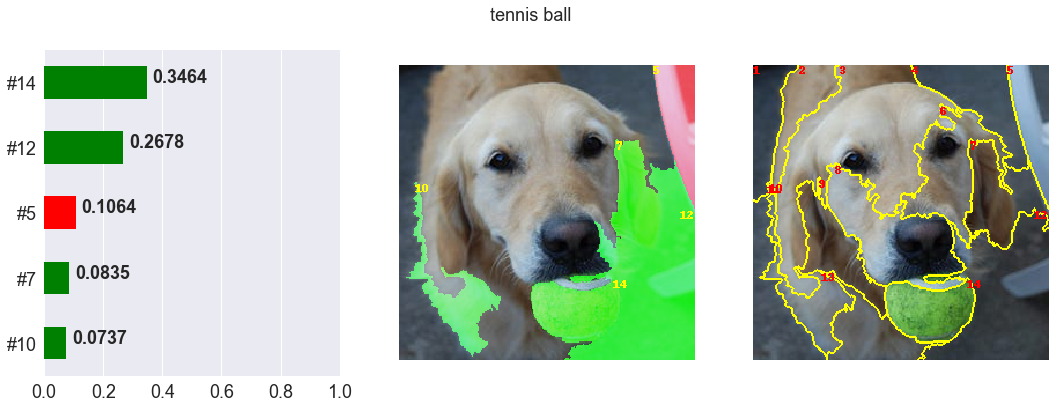

In [8]:
exo.plot_image_explanation(blimey_image, explain_classes[0])

### Prediction Explanation ###

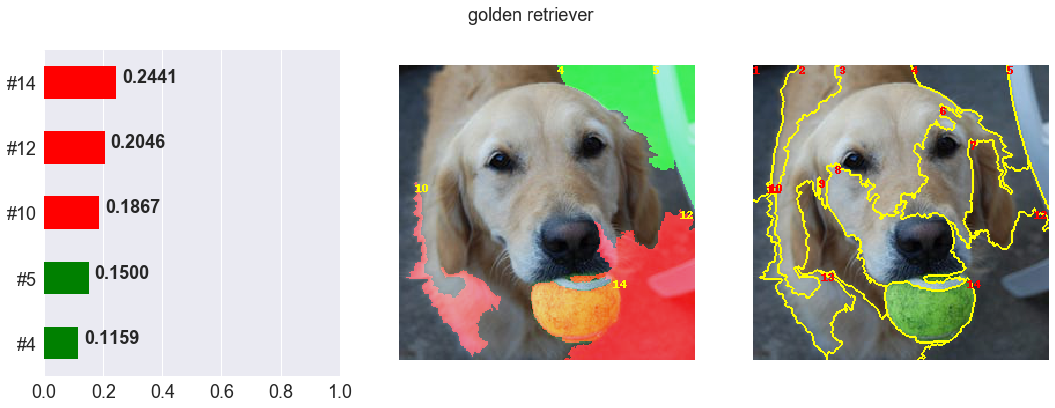

In [9]:
exo.plot_image_explanation(blimey_image, explain_classes[1])

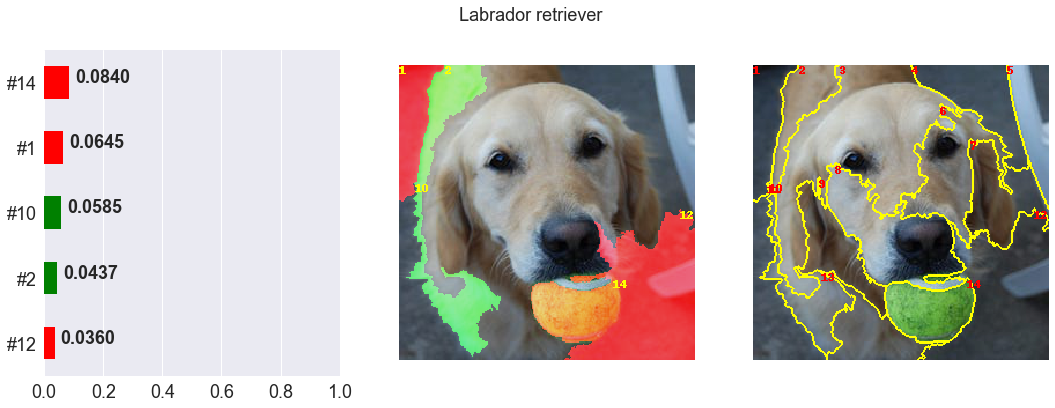

In [10]:
exo.plot_image_explanation(blimey_image, explain_classes[2])

### Image Surrogates (LIME) ###

<div class="row">
<div class="column">
<br>
<img width="50%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column fragment">
<br>
<img width="70%" align="middle" src="../../../assets/images/figures/surrogate-images.svg" alt="bLIMEy image" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

<img width="70%" align="middle" src="../../../assets/images/figures/blimey_img.png" alt="bLIMEy image explanation" style="display: block; margin-left: auto; margin-right: auto;">

### Explainer Demo ###

In [11]:
# Configure widgets to select occlusion colour, segmentation granularity and
# explained class
colour_selection = {
    i: i for i in ['mean', 'black', 'white', 'randomise-patch', 'green']
}
granularity_selection = {'low': 13, 'medium': 30, 'high': 50}
class_selection = {label: class_id for label, class_id in explain_classes}

In [12]:
# Generate explanations
blimey_image_collection = {}
for gran_name, gran_number in granularity_selection.items():
    blimey_image_collection[gran_name] = {}
    for col_name in colour_selection:
        blimey_image_collection[gran_name][col_name] = exo.build_image_blimey(
            doggo_array,
            clf.predict_proba,
            explain_classes,
            explanation_size=5,
            segments_number=gran_number,
            occlusion_colour=col_name,
            samples_number=SAMPLES,
            batch_size=BATCH,
            random_seed=42)

22-May-02 16:31:34 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:34 fatf         INFO     Seeding RNGs with 42.
22-May-02 16:31:36 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:36 fatf         INFO     Seeding RNGs with 42.
22-May-02 16:31:38 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:38 fatf         INFO     Seeding RNGs with 42.
22-May-02 16:31:40 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:40 fatf         INFO     Seeding RNGs with 42.
22-May-02 16:31:42 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:42 fatf         INFO     Seeding RNGs with 42.
22-May-02 16:31:44 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:44 fatf         INFO     Seeding RNGs with 42.
22-May-02 16:31:46 fatf         INFO     Seeding RNGs using the input parameter.
22-May-02 16:31:46 fatf         INFO     Seeding RNGs w

In [13]:
# Plot bar-plot explanation, image explanation and randomly occluded example
surrogate_image_explainer = exo.generate_image_widget(
    blimey_image_collection,
    granularity_selection,
    colour_selection,
    class_selection)

In [14]:
surrogate_image_explainer

<h2 style="text-align: center">Surrogate Explainers of Tabular Data</h2>

### Classifying Iris Flowers ###

<img width="30%" align="middle" src="../../../assets/images/figures/iris.png" alt="Iris Data Set" style="display: block; margin-left: auto; margin-right: auto;">
<img width="70%" align="middle" src="../../../assets/images/figures/iris-classes.jpeg" alt="Iris Classes" style="display: block; margin-left: auto; margin-right: auto;">

In [15]:
# Load the iris data set
iris = sklearn.datasets.load_iris()
iris_X = iris.data  # [:, :2]  #  take the first two features only
iris_y = iris.target

iris_labels = iris.target_names
iris_feature_names = iris.feature_names

label2class = {lab: i for i, lab in enumerate(iris_labels)}
feature2name = {i: feat for i, feat in enumerate(iris_feature_names)}

# Fit the classifier
logreg = sklearn.linear_model.LogisticRegression(C=1e5)
logreg.fit(iris_X, iris_y)

LogisticRegression(C=100000.0)

In [16]:
# Configure widgets to select explained instance, discretisation and
# explained class
_dtype = iris_X.dtype
explained_instances = {
    'setosa': np.array([5, 3.5, 1.5, 0.25]).astype(_dtype),
    'versicolor': np.array([5.5, 2.75, 4.5, 1.25]).astype(_dtype),
    'virginica': np.array([7, 3, 5.5, 2.25]).astype(_dtype)
}

petal_length_idx = iris_feature_names.index('petal length (cm)')
petal_length_bins = [1, 2, 3, 4, 5, 6, 7]
petal_width_idx = iris_feature_names.index('petal width (cm)')
petal_width_bins = [0, .5, 1, 1.5, 2, 2.5]
discretisation = {
    petal_length_idx: {
        'range': petal_length_bins,
        'default': [2, 3],
        'step': 1
    },
    petal_width_idx: {
        'range': petal_width_bins,
        'default': [.5, 1],
        'step': .5
    }
}

# Fix global options
SAMPLE_IRIS = False
IRIS_SAMPLES = 50000

In [17]:
surrogate_tabular_explainer = exo.generate_tabular_widget(
    explained_instances,
    discretisation,
    label2class,
    feature2name,
    iris_X,
    iris_y,
    logreg.predict_proba,
    samples_number=IRIS_SAMPLES,
    sample=SAMPLE_IRIS,
    random_seed=42)

### Tabular Surrogates (LIME) ###

<div class="row">
<div class="column">
<br>
<img width="50%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column fragment">
<br>
<img width="70%" align="middle" src="../../../assets/images/figures/surrogate-tabular.svg" alt="bLIMEy tabular" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

<img width="70%" align="middle" src="../../../assets/images/figures/blimey_tab.png" alt="bLIMEy tabular explanation" style="display: block; margin-left: auto; margin-right: auto;">

### Explainer Demo ###

In [18]:
surrogate_tabular_explainer

<h2 style="text-align: center">Other Tabular Data Explainers</h2>

In [19]:
# Fix global options
PI_REPEATS = 30

# Widget specification
pi_metrics = {
    'R-squared':'r2',
    'MSE':'neg_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'max':'max_error'
}
feature_grouping = [[2, 3], [0, 1]]

In [20]:
# Generate permutation importance
pi = pid.build_permutation_importance(
    iris_X,
    iris_y,
    iris_feature_names,
    logreg,
    pi_metrics.values(),
    repeats=PI_REPEATS,
    random_seed=42
)

In [21]:
# Generate widget
pi_widget = pid.generate_pi_widget(
        pi_metrics, pi, feature_grouping, iris_X, iris_y, iris_feature_names)

### Permutation Feature Importance ###

In [22]:
pi_widget

### Individual Conditional Expectation and Partial Dependence ###

In [23]:
# Fix global options
ICE_PD_SAMPLES = 200

# Widget specification
feature_idxs = [2, 3]
class2label = {v: k for k, v in label2class.items()}

In [24]:
ice_pd = pid.build_ice_pd(
    iris_X,
    logreg,
    feature_idxs,
    samples_no=ICE_PD_SAMPLES)

In [25]:
ice_pd_widget = pid.generate_ice_pd_widget(
    ice_pd, class2label, iris_feature_names)

In [26]:
ice_pd_widget

<h2 style="text-align: center">Key Points</h2>
<br/><br/>

* These **diagnostic tools** only become **explainers** when their *properties* and *outputs* are well understood
* Explainers **are not** *monolithic* entities
* They need to be **configured** or **tailor-made** for the application at hand

<h2 style="text-align: center">Where to Go from Here</h2>

<img width="10%" style="vertical-align:top; float:right;" src="../../../assets/images/fatf.png">
<h3><tt>FAT Forensics</tt> &lt;<a href="https://fat-forensics.org/">https://fat-forensics.org/</a>&gt;</h3>
<br>

* A modular Python toolkit for algorithmic Fairness, Accountability and **Transparency**
* Aimed at both *end-users* and *domain experts*
* Built for *research* and *deployment*

<br>

Journal paper: https://joss.theoj.org/papers/10.21105/joss.01904

<img width="25%" style="vertical-align:top; float:right;" src="../../../assets/images/2020ecmlpkdd.png">
<h3>ECML-PKDD 2020 Hands-on Explainability Tutorial</h3>
<br><br>

* Tutorial resources: https://events.fat-forensics.org/2020_ecml-pkdd
* These interactive slides will be published in the coming weeks (https://events.fat-forensics.org/)

<img width="20%" style="vertical-align:top; float:right;" src="../../../assets/images/turing.png">
<h3>Self-paced Online Learning</h3>
<br><br>

* Interactive online training resources on *interpretability*, *explainability* and *transparency*
* To be published in *Winter 2021*

<img width="20%" style="vertical-align:top; float:right;" src="../../../assets/images/TAILOR-logo-light-background.png">
<h3>TAILOR Network &lt;<a href="https://tailor-network.eu/">https://tailor-network.eu/</a>&gt;</h3>
<br><br>

* Horizon 2020 ICT-48 European AI excellence centre
* Developing **Trustworthy AI** thorugh integrating *learning*, *optimisation* and *reasoning*

---

* Upcoming **Summer School** (free registration?)

<h2 style="text-align: center; vertical-align: center;">Questions?</h2>
<br><br><br>
<p style="text-align: right; vertical-align:bottom; float:right; font-size: 100%;"><a href="K.Sokol@bristol.ac.uk">K.Sokol@bristol.ac.uk</a></p>